# Đồ án cuối kỳ môn Lập trình cho Khoa học dữ liệu
## Giảng viên hướng dẫn: 
### Thầy Trần Trung Kiên
### Cô Phan Thị Phương Uyên
## Sinh viên thực hiện:
##### Dương Hoàng Quang Khanh, mã sinh viên: 1712521

---

## Import các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Về nguồn dữ liệu:
Dữ liệu được sử dụng trong bài tập này là dữ liệu về 20 nhóm mặt hàng xuất khẩu và 20 nhóm mặt hàng xuất khẩu chủ lực của Việt Nam với các quốc gia trên thế giới trong giai đoạn 2010-2019. Dữ liệu được thống kê bởi Phòng ban thống kê Liên Hợp Quốc (United Nations Statistics Division) và được em trích xuất và tải về từ trang https://comtrade.un.org/data. Dữ liệu được thống kê theo từng năm và được lưu trong file "comtrade_data.csv". 

## Khám phá dữ liệu
### Đọc dữ liệu từ file

In [2]:
pd.set_option('display.max_columns', None) #Giúp hiển thị tất cả các cột của dữ liệu
data = pd.read_csv("comtrade_data.csv")
data.head(10)

,Classification,Year,Period,Period Desc.,Aggregate Level,Trade Flow Code,Trade Flow,Reporter Code,Reporter,Reporter ISO,Partner Code,Partner,Partner ISO,Commodity Code,Commodity,Qty Unit Code,Qty Unit,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,H5,2019,2019,2019,2,0,M,704,Viet Nam,VNM,842,USA,USA,2,Meat and edible meat offal,-1,NaN,0.0,-1,NaN,0.0,0.0,0.0,201058755,2.010588e+08,NaN,4
1,H5,2019,2019,2019,2,0,M,704,Viet Nam,VNM,699,India,IND,2,Meat and edible meat offal,-1,NaN,0.0,-1,NaN,0.0,0.0,0.0,178868209,1.788682e+08,NaN,4
2,H5,2018,2018,2018,2,0,M,704,Viet Nam,VNM,842,USA,USA,2,Meat and edible meat offal,-1,NaN,0.0,-1,NaN,0.0,0.0,0.0,168236990,1.682370e+08,NaN,4
3,H4,2017,2017,2017,2,0,M,704,Viet Nam,VNM,842,USA,USA,2,Meat and edible meat offal,-1,NaN,0.0,-1,NaN,0.0,NaN,NaN,123859577,1.238596e+08,NaN,0
4,H4,2016,2016,2016,2,0,M,704,Viet Nam,VNM,699,India,IND,2,Meat and edible meat offal,-1,NaN,0.0,-1,NaN,0.0,NaN,NaN,103212633,1.032126e+08,NaN,0
5,H5,2019,2019,2019,2,0,M,704,Viet Nam,VNM,36,Australia,AUS,2,Meat and edible meat offal,-1,NaN,0.0,-1,NaN,0.0,0.0,0.0,98907346,9.890735e+07,NaN,4
6,H4,2016,2016,2016,2,0,M,704,Viet Nam,VNM,842,USA,USA,2,Meat and edible meat offal,-1,NaN,0.0,-1,NaN,0.0,NaN,NaN,97801353,9.780135e+07,NaN,0
7,H4,2015,2015,2015,2,0,M,704,Viet Nam,VNM,842,USA,USA,2,Meat and edible meat offal,-1,NaN,NaN,-1,NaN,NaN,NaN,NaN,95843013,9.584301e+07,NaN,0
8,H5,2018,2018,2018,2,0,M,704,Viet Nam,VNM,699,India,IND,2,Meat and edible meat offal,-1,NaN,0.0,-1,NaN,0.0,0.0,0.0,86784142,8.678414e+07,NaN,4
9,H3,2011,2011,2011,2,0,M,704,Viet Nam,VNM,842,USA,USA,2,Meat and edible meat offal,-1,NaN,NaN,-1,NaN,NaN,NaN,NaN,86117512,8.611751e+07,NaN,0


### Kích thước của dữ liệu

In [3]:
print(data.shape)

(31520, 27)


Có thể thấy dữ liệu gồm có 31520 dòng và 28 cột.

Mỗi dòng dữ liệu mô tả về giá trị xuất khẩu hoặc nhập khẩu của Việt Nam với một đối tác về một nhóm mặt hàng trong một năm duy nhất.

### Về mô tả thông tin của mỗi cột xin mời xem mô tả dưới đây:

- **Classification**: các phân loại quốc tế áp dụng cho dữ liệu thương mại và thuế quan được đưa ra bởi tổ chức Hải quan thế giới (WCO), H3 áp dụng cho hàng hóa từ 2007 - 2012, H4 là từ 2012 - 2017, và H5 là từ 2017 đến nay.
- **Year, Period, Period Desc**: Vì dữ liệu thông kê theo từng năm nên cả ba cột này đều mô tả năm mà dữu liệu được thống kê.
- **Aggregate Level**: đề cập đến mức độ chi tiết trong thống kê dữ liệu.
- **Trade Flow Code, Trade Flow**: phân biệt giữa mặt hàng xuất khẩu và nhập khẩu. 
- **Reporter Code, Reporter, Reporter ISO**: lần lượt là Mã số, Tên, Viết tắt của quốc gia được chọn là chủ thể thu thập thông tin. Ở đây là Việt Nam.
- **Partner Code, Partner, Partner ISO**: lần lượt là Mã số, Tên Viết tắt của các quốc gia đối tác.
- **Qty Unit Code, Qty Unit, Qty, Alt Qty Unit Code, Alt Qty Unit, Alt Qty, Netweight (kg), Gross weight (kg)**: Các cột này nói về các đơn vị số lượng và khối lượng hàng hóa, nhưng vì ở đây người ta chỉ thống kê về giá trị nên cá cột này không mang ý nghĩa.
- **Trade Value, CIF Trade Value, FOB Trade Value**: được tính theo US$, là tổng giá trị trong năm đó.

## Tiền xử lý dữ liệu

### Loại bỏ trước một số cột không mang lại nhiều giá trị thông tin

Các giá trị trong một số cột mà ta xem xét sẽ bỏ.

In [4]:
data["Classification"].unique()
c = ["Classification", "Reporter", "Reporter Code", "Reporter ISO", "Qty Unit Code",
     "Qty Unit", "Qty", "Alt Qty Unit Code", "Alt Qty Unit", "Alt Qty", "Netweight (kg)", "Gross weight (kg)"]
unq = pd.Series([data[i].unique() for i in c], index=c)
unq

Classification       [H5, H4, H3]
Reporter               [Viet Nam]
Reporter Code               [704]
Reporter ISO                [VNM]
Qty Unit Code                [-1]
Qty Unit                    [nan]
Qty                    [0.0, nan]
Alt Qty Unit Code            [-1]
Alt Qty Unit                [nan]
Alt Qty                [0.0, nan]
Netweight (kg)         [0.0, nan]
Gross weight (kg)      [0.0, nan]
dtype: object

- Cột **"Classification"** này chỉ có 3 giá trị là 'H3', 'H4', 'H5'. Nó biểu thị cho hàng hóa giao dịch trong giai đoạn nào ứng với 3 giá trị này. Vì trong dữ liệu này ta đã có thông tin về năm giao dịch ở cột **"Year"**, thậm chí cột này còn chi tiết về năm hơn, do đó ta có thể bỏ đi cột **"Classification"**.
- Ba cột **"Reporter", "Reporter ISO", "Partner Code"** đều chỉ chứa 1 giá trị trong mỗi cột (liên quan đến Việt Nam) vì trong dữ liệu này thì Việt Nam là quốc gia được thống kê, do đó ta có thể bỏ giữ lại 1 trong 3 cột này.
- Các cột **Qty Unit Code, Qty Unit, Qty, Alt Qty Unit Code, Alt Qty Unit, Alt Qty, Netweight (kg), Gross weight (kg)** chỉ chứ các giá trị không có ý nghĩa nên ta cũng sẽ bỏ.
- Ba cột là **"Year", "Period", "Period Desc."** đều cùng mang một giá trị là năm thống kê nên ta chỉ cần giữ lại một cột là **"Year"** và bỏ đi hai cột **"Period", "Period Desc."**.
- Hai cột cùng biểu diễn các giá trị phân biệt Xuất khẩu với nhập khẩu là **"Trade Flow Code"**và **"Trade Flow"** chỉ cần giữ lại 1 cột.
- Các cột **"Partner Code", "Partner", "Partner ISO"** đều biểu diễn cùng một quốc gia đối tác trên một dòng, nên ta có thể bỏ đi hai cột là **"Partner Code", "Partner ISO"** và giữ lại cột **"Partner""**
- Một điều đáng lưu ý Mới các mặt hàng nhập khẩu thì **"Trade value"** sẽ bằng **"CIF Trade Value"**, ngược lại với hàng hóa xuất khẩu thì **"Trade Value"** sẽ bằng **"FOB Trade Value"**. Dó đó ta chỉ cẩn giữ lại cột **Trade Value**.

Các cột ta sẽ bỏ đi đó là "Classification", "Reporter", "Reporter Code", "Reporter ISO", "Qty Unit Code", "Qty Unit", "Qty", "Alt Qty Unit Code", "Alt Qty Unit", "Alt Qty", "Netweight (kg)", "Gross weight (kg)","Period", "Period Desc.", "Partner Code", "Partner ISO", "CIF Trade Value", "FOB Trade Value".

In [5]:
drop_cols = ["Classification", "Trade Flow Code", "Reporter Code", "Reporter ISO", "Qty Unit Code",
             "Qty Unit", "Qty", "Alt Qty Unit Code", "Alt Qty Unit", "Alt Qty", "Netweight (kg)", "Gross weight (kg)", 
             "Period", "Period Desc.", "Partner Code", "Partner ISO", "CIF Trade Value (US$)", "FOB Trade Value (US$)"]
data.drop(labels=drop_cols, axis=1, inplace=True)
data.head(10)

,Year,Aggregate Level,Trade Flow,Reporter,Partner,Commodity Code,Commodity,Trade Value (US$),Flag
0,2019,2,M,Viet Nam,USA,2,Meat and edible meat offal,201058755,4
1,2019,2,M,Viet Nam,India,2,Meat and edible meat offal,178868209,4
2,2018,2,M,Viet Nam,USA,2,Meat and edible meat offal,168236990,4
3,2017,2,M,Viet Nam,USA,2,Meat and edible meat offal,123859577,0
4,2016,2,M,Viet Nam,India,2,Meat and edible meat offal,103212633,0
5,2019,2,M,Viet Nam,Australia,2,Meat and edible meat offal,98907346,4
6,2016,2,M,Viet Nam,USA,2,Meat and edible meat offal,97801353,0
7,2015,2,M,Viet Nam,USA,2,Meat and edible meat offal,95843013,0
8,2018,2,M,Viet Nam,India,2,Meat and edible meat offal,86784142,4
9,2011,2,M,Viet Nam,USA,2,Meat and edible meat offal,86117512,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31520 entries, 0 to 31519
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               31520 non-null  int64 
 1   Aggregate Level    31520 non-null  int64 
 2   Trade Flow         31520 non-null  object
 3   Reporter           31520 non-null  object
 4   Partner            31520 non-null  object
 5   Commodity Code     31520 non-null  int64 
 6   Commodity          31520 non-null  object
 7   Trade Value (US$)  31520 non-null  int64 
 8   Flag               31520 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 2.2+ MB


- Nhìn chung do quá trình thống kê của United Nations Statistics Division là rất kỹ lưỡng nên ngoài không có giá trị nào bị thiếu.

Giá trị cột **Trade Value (US$)** nằm trong khoảng nào?

In [7]:
tradevalue_max = data["Trade Value (US$)"].max()
tradevalue_min = data["Trade Value (US$)"].min()
print("trade value max (US$): ",tradevalue_max)
print("trade value min (US$): ",tradevalue_min)

trade value max (US$):  25986120991
trade value min (US$):  200


Con số trong cột **Trade Value (US\$)** lớn nhất lên tới hàng chục tỷ tính theo đơn vị US\$, để dễ quan sát ta sẽ thêm cột **Trade_value** bằng cách lấy các giá trị từ cột **Trade Value (US\$)** chia cho $ 10^6 $, nghĩa là đơn trị trong cột mới là triệu USD.

In [8]:
data["Trade_value"] = data["Trade Value (US$)"]/10**6
data.head()

,Year,Aggregate Level,Trade Flow,Reporter,Partner,Commodity Code,Commodity,Trade Value (US$),Flag,Trade_value
0,2019,2,M,Viet Nam,USA,2,Meat and edible meat offal,201058755,4,201.058755
1,2019,2,M,Viet Nam,India,2,Meat and edible meat offal,178868209,4,178.868209
2,2018,2,M,Viet Nam,USA,2,Meat and edible meat offal,168236990,4,168.236990
3,2017,2,M,Viet Nam,USA,2,Meat and edible meat offal,123859577,0,123.859577
4,2016,2,M,Viet Nam,India,2,Meat and edible meat offal,103212633,0,103.212633


## Quay lại bước khám phá dữ liệu

### Mỗi cột có kiểu dữ liệu gì?

In [9]:
col_dtypes = data.dtypes
col_dtypes

Year                   int64
Aggregate Level        int64
Trade Flow            object
Reporter              object
Partner               object
Commodity Code         int64
Commodity             object
Trade Value (US$)      int64
Flag                   int64
Trade_value          float64
dtype: object

Ta thấy ngoài các cột có dữ liệu kiểu int thì có 4 cột có dữ liệu là kiểu object. Để xem các cột này có phải chỉ chứa kiểu dữ liệu chuỗi không ta thực hiện như dưới đây:

In [10]:
object_cols = ["Trade Flow", "Reporter","Partner", "Commodity"]
for c in object_cols:
    dtypes = set()
    for i in range(len(data[c])):
        dtypes.add(type(data.loc[i,c]))
    print("Column ",c," has type: ", dtypes)

Column  Trade Flow  has type:  {<class 'str'>}
Column  Reporter  has type:  {<class 'str'>}
Column  Partner  has type:  {<class 'str'>}
Column  Commodity  has type:  {<class 'str'>}


Như vậy là các cột này đều chỉ có kiểu string.

### Các cột dữ liệu dạng categorical có những giá trị nào?

In [11]:
NumUniqueVals = pd.Series([len(data[i].unique()) for i in ["Trade Flow", "Reporter","Partner", "Commodity", "Commodity Code"]],
                          index= ["Trade Flow", "Reporter","Partner", "Commodity", "Commodity Code"])
NumUniqueVals
# data[["Partner"]].value_counts()

Trade Flow          2
Reporter            1
Partner           176
Commodity          34
Commodity Code     34
dtype: int64

In [12]:
print(data["Trade Flow"].unique())

['M' 'X']


Dữ liệu ở cột **Trade Flow** chỉ có hai giá trị là 'X' và 'M' tương ứng với xuất khẩu (Export) và nhập khẩu (Import). Hai giá trị này có thể sẽ được dùng để tách dữ liệu làm 2 DataFrame cho hàng hóa xuất - nhập khẩu riêng biệt.


### Các nhóm hàng xuất khẩu gồm những gì?


In [13]:
data[data['Trade Flow']=='X']['Commodity'].unique()

array(['Fish and crustaceans, molluscs and other aquatic invertebrates',
       'Fruit and nuts, edible; peel of citrus fruit or melons',
       'Coffee, tea, mate and spices', 'Cereals',
       'Mineral fuels, mineral oils and products of their distillation; bituminous substances; mineral waxes',
       'Plastics and articles thereof', 'Rubber and articles thereof',
       'Articles of leather; saddlery and harness; travel goods, handbags and similar containers; articles of animal gut (other than silk-worm gut)',
       'Wood and articles of wood; wood charcoal',
       'Paper and paperboard; articles of paper pulp, of paper or paperboard',
       'Cotton', 'Apparel and clothing accessories; knitted or crocheted',
       'Apparel and clothing accessories; not knitted or crocheted',
       'Footwear; gaiters and the like; parts of such articles',
       'Glass and glassware', 'Iron and steel',
       'Copper and articles thereof', 'Aluminium and articles thereof',
       'Electrical ma

### Các nhóm hàng Nhập khẩu gồm những gì?


In [14]:
data[data['Trade Flow']=='M']['Commodity'].unique()

array(['Meat and edible meat offal',
       'Food industries, residues and wastes thereof; prepared animal fodder',
       'Ores, slag and ash',
       'Mineral fuels, mineral oils and products of their distillation; bituminous substances; mineral waxes',
       'Inorganic chemicals; organic and inorganic compounds of precious metals; of rare earth metals, of radio-active elements and of isotopes',
       'Organic chemicals',
       'Essential oils and resinoids; perfumery, cosmetic or toilet preparations',
       'Plastics and articles thereof',
       'Raw hides and skins (other than furskins) and leather',
       'Man-made staple fibres',
       'Wadding, felt and nonwovens, special yarns; twine, cordage, ropes and cables and articles thereof',
       'Footwear; gaiters and the like; parts of such articles',
       'Glass and glassware', 'Iron or steel articles',
       'Metal; miscellaneous products of base metal',
       'Electrical machinery and equipment and parts thereof; sound

## Đưa ra các câu hỏi cần trả lời từ dữ liệu:

- Câu 1: Có 20 nhóm hàng xuất khẩu và 20 nhóm hàng nhập khẩu nhưng tại sao chỉ có 34 gián trị khác nhau ở cột **Commodity?** Như vậy phải có 6 loại hàng hóa nằm ở cả hai danh mục xuất nhập khẩu. Đó là những loại hàng nào, có mã là gì? 6 loại hàng hóa này có mang ý nghĩa gì khi nằm ở cả hai hạng mục.
- Câu 2: Trong năm 2019 đâu là 3 quốc gia là đối tác lớn nhất của Việt Nam ở cả thị trường xuất khẩu và nhập khẩu theo từng năm? Khảo sát quá trình tăng trưởng kim ngạch xuất khẩu của Việt Nam lên trên 3 quốc gia này trong gia đoạn được thống kê.
- Câu 3: Tính theo năm 2019 hãy chỉ ra 3 nhóm mặt hàng xuất khẩu chủ lực và 3 nhóm mặt hàng nhập khẩu chính và đâu là thị trường chính của các nhóm mặt hàng này.
- Câu 4: Trong những năm này thì năm nào Việt Nam là quốc gia Xuất siêu hay Nhập siêu.

### Tách dữ liệu:
Để tiện cho việc trả lời các câu hỏi được nêu thì đầu tiên ta tách dữ liệu thành hai DataFrame riêng biệt, một DataFrame lưu các thông tin về hàng hóa xuất khẩu, DataFrame kia lưu thông tin về hàng hóa nhập khẩu.

In [15]:
export_df = data[data["Trade Flow"] == 'X']
export_df=export_df.drop(labels="Trade Flow", axis=1)
export_df.head()


,Year,Aggregate Level,Reporter,Partner,Commodity Code,Commodity,Trade Value (US$),Flag,Trade_value
345,2019,2,Viet Nam,China,3,"Fish and crustaceans, molluscs and other aquat...",1214590404,4,1214.590404
346,2014,2,Viet Nam,USA,3,"Fish and crustaceans, molluscs and other aquat...",1063638814,0,1063.638814
347,2017,2,Viet Nam,China,3,"Fish and crustaceans, molluscs and other aquat...",1061198627,0,1061.198627
348,2018,2,Viet Nam,USA,3,"Fish and crustaceans, molluscs and other aquat...",1048403135,4,1048.403135
349,2018,2,Viet Nam,China,3,"Fish and crustaceans, molluscs and other aquat...",998828981,4,998.828981


In [16]:
import_df = data[data["Trade Flow"] == 'M']
import_df=import_df.drop(labels="Trade Flow", axis=1)
import_df.head()

,Year,Aggregate Level,Reporter,Partner,Commodity Code,Commodity,Trade Value (US$),Flag,Trade_value
0,2019,2,Viet Nam,USA,2,Meat and edible meat offal,201058755,4,201.058755
1,2019,2,Viet Nam,India,2,Meat and edible meat offal,178868209,4,178.868209
2,2018,2,Viet Nam,USA,2,Meat and edible meat offal,168236990,4,168.236990
3,2017,2,Viet Nam,USA,2,Meat and edible meat offal,123859577,0,123.859577
4,2016,2,Viet Nam,India,2,Meat and edible meat offal,103212633,0,103.212633


### Câu 1: Những nhóm hàng nào vừa nằm ở danh mục sản phẩm xuất khẩu và nhập khẩu, chúng có mã là gì? 6 loại hàng hóa này có mang ý nghĩa gì khi nằm ở cả hai hạng mục.

In [17]:
ex_commodity_set = set(export_df["Commodity"].unique())
im_commodity_set = set(import_df["Commodity"].unique())
intersect_commodity = ex_commodity_set.intersection(im_commodity_set)
for i in intersect_commodity:
    print("- ", i)
ex_commoditycode_set = set(export_df["Commodity Code"].unique())
im_commoditycode_set = set(import_df["Commodity Code"].unique())
intersect_commoditycode = ex_commoditycode_set.intersection(im_commoditycode_set)
print("Mã các loại mặt hàng: ",intersect_commoditycode)

-  Plastics and articles thereof
-  Footwear; gaiters and the like; parts of such articles
-  Electrical machinery and equipment and parts thereof; sound recorders and reproducers; television image and sound recorders and reproducers, parts and accessories of such articles
-  Mineral fuels, mineral oils and products of their distillation; bituminous substances; mineral waxes
-  Furniture; bedding, mattresses, mattress supports, cushions and similar stuffed furnishings; lamps and lighting fittings, n.e.c.; illuminated signs, illuminated name-plates and the like; prefabricated buildings
-  Glass and glassware
Mã các loại mặt hàng:  {64, 70, 39, 85, 27, 94}


- Như vậy 6 loại mặt hàng được vừa có mặt trong danh mục nhập khẩu và xuất khẩu là 6 nhóm mặt hàng được kể ra ở trên, ứng với các "Commodity Code" là: 64, 70, 39, 85, 27, 94.
- Việc có một số nhóm sản phàm nằm ở cả hai danh mục trên theo em có thể được giải thích một cách dễ hiểu như sau:
    + Thứ nhất, đây là nhóm mặt hàng gồm có nhiều dòng sản phẩm, chúng ta xuất khẩu một số dòng sản phẩm và nhập khẩu về các loại sản phẩm khác trong nhóm này. Ví dụ rõ nhất là hai nhóm hàng liên quan đến các sản phẩm nhựa (mã 39) và dày dép (mã 64) ở trên, ở Việt Nam có nhiều công ty lớn sẳn xuất hai mặt hàng này và chúng được xuất khuẩ sang các nước, đồng thời chúng ta vần nhập khẩu các sản phẩm nhựa hay giày dép từ các nước bên ngoài.
    + Thứ hai, đây là các nhóm mặt hàng được tái xuất khẩu hoặc tái nhập khẩu. Điển hình là các mặt hàng thuộc nhóm Chất khoáng và dầu mỏ (mã 27). Chúng ta xuất khẩu dầu thô sáng các nước vừa nhập dầu thô và xăng thành phẩm về. Nguyên nhân là do:  Kết quả từ phòng thí nghiệm cho thấy sản phẩm dầu thô của Bạch Hổ có hàm lượng lưu huỳnh rất thấp, được thị trường nước ngoài ưa chuộng, có thể bán với giá cao. Đồng thời cũng kết quả thí nghiệm cho thấy chúng ta có thể pha 20% dầu thô nhập từ nước ngoài với giá thấp mà vẫn cho ra sản phẩm tốt. Vì thế mới có chuyện xuất dầu thô mà vẫn nhập dầu thô.

### Câu 2:  Trong năm 2019 đâu là 3 quốc gia là đối tác lớn nhất của Việt Nam ở cả thị trường xuất khẩu và nhập khẩu theo từng năm? Khảo sát quá trình tăng trưởng kim ngạch xuất khẩu của Việt Nam lên trên 3 quốc gia này trong gia đoạn được thống kê.

- Với câu hỏi này ta sẽ trả lời lần lượt trên thị trường xuất khảu rồi đến nhập khẩu.

#### Đầu tiên hãy khảo sát trên dữ liệu xuất khẩu.

In [18]:
# Hàm tìm số đối tác đứng đầu theo năm:
def top_partner(data, year=0, top = 3):
    if year > 0:
        df = data[data["Year"]==year]
    else:
        df=data
#     sr=df.groupby("Partner")["Trade_value"].sum()
#     sr=sr.sort_values(ascending = False)
    df=df.groupby(['Partner']).agg({'Trade_value':'sum'})
    df.columns = ['Trade_value_sum']
    df=df.reset_index()
    df=df.sort_values(by="Trade_value_sum", ascending = False)
    return df[:top]

In [19]:
top_partner(export_df, year=2019, top=3)

,Partner,Trade_value_sum
87,USA,51869.741619
16,China,33756.335339
70,Rep. of Korea,15809.778886


- Như vậy trong năm 2019 thì lần lượt Mỹ, Trung Quốc và Nhật Bản là 3 quốc gia đứng đầu về kim ngạch xuất khẩu của Việt Nam.
- Mở rộng khảo sát quá trình tăng trưởng kim ngạch xuất khẩu của Việt Nam lên trên 3 quốc gia này trong gia đoạn 2010-2019.

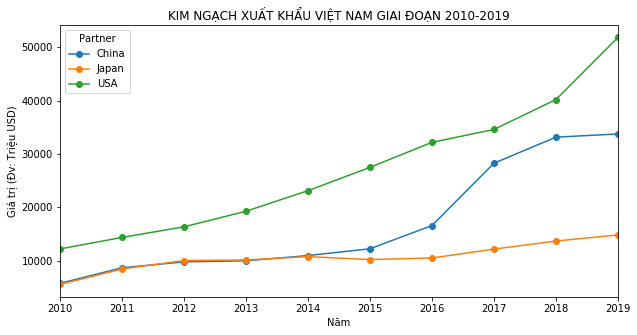

In [20]:
year = sorted(export_df["Year"].unique())
partner = ['USA', 'China', 'Japan']
df = export_df[['Year','Partner','Trade_value']].loc[export_df['Partner'].isin(partner)]
group_df=df.groupby(by=['Year','Partner']).agg({'Trade_value':'sum'})
group_df.columns = ['Trade_value_sum']
group_df=group_df.reset_index()
group_df = group_df.pivot(index='Year', columns='Partner', values='Trade_value_sum')
group_df.plot(marker='o',figsize=(10,5),title = "KIM NGẠCH XUẤT KHẨU VIỆT NAM GIAI ĐOẠN 2010-2019",
              ylabel = "Giá trị (Đv: Triệu USD)", xlabel = "Năm",xlim =(2010,2019))

Qua sơ đồ trên thì ta có thể thấy kim ngạch xuất khẩu với ba quốc gia My, Trung quốc và Nhật Bản đều tăng trong giai đoạn 2010-2019. Trong đó Mỹ và Trung Quốc tăng trưởng rất nhanh, đặc biệt là Mỹ, quốc gia luôn đứng đầu trong kim ngạch xuất khẩu của Việt Nam.

#### Tiếp theo hãy khảo sát trên dữ liệu nhập khẩu.

In [21]:
top_partner(import_df, year=2019, top=3)

,Partner,Trade_value_sum
16,China,43354.880422
70,Rep. of Korea,36232.053128
43,Japan,10973.986192


- Như vậy trong năm 2019 thì lần lượt Trung Quốc, Hàn Quốc và Nhật Bản là 3 quốc gia đứng đầu về kim ngạch nhập khẩu của Việt Nam.
- Mở rộng khảo sát quá trình tăng trưởng kim ngạch nhập khẩu của Việt Nam lên trên 3 quốc gia này trong gia đoạn 2010-2019.

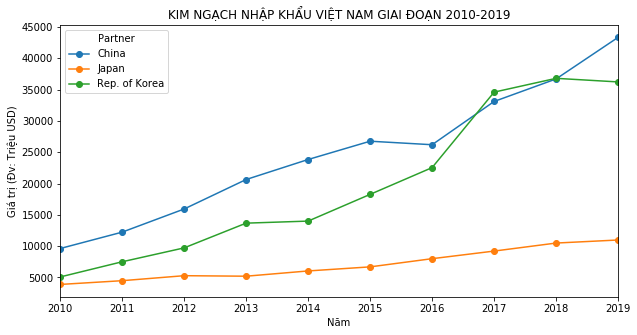

In [22]:
year = sorted(export_df["Year"].unique())
partner = ['Rep. of Korea', 'China', 'Japan']
df = import_df[['Year','Partner','Trade_value']].loc[import_df['Partner'].isin(partner)]
group_df=df.groupby(by=['Year','Partner']).agg({'Trade_value':'sum'})
group_df.columns = ['Trade_value_sum']
group_df=group_df.reset_index()
group_df = group_df.pivot(index='Year', columns='Partner', values='Trade_value_sum')
group_df.plot(marker='o',figsize=(10,5),title = "KIM NGẠCH NHẬP KHẨU VIỆT NAM GIAI ĐOẠN 2010-2019",
              ylabel = "Giá trị (Đv: Triệu USD)", xlabel = "Năm",xlim =(2010,2019))

Qua sơ đồ trên thì ta có thể thấy kim ngạch xuất khẩu với ba quốc gia Hàn Quốc, Trung quốc và Nhật Bản đều tăng trong giai đoạn 2010-2019. Trong đó Hàn Quốc và Trung Quốc tăng trưởng rất nhanh so vơi Nhập Bản. Đến năm 2019 thì Trung Quốc vượt qua Hàn Quốc trở thành quốc gia  đứng đầu trong kim ngạch nhập khẩu của Việt Nam.

### Câu 3: Tính theo năm 2019 hãy chỉ ra 3 nhóm mặt hàng xuất khẩu chủ lực và 3 nhóm mặt hàng nhập khẩu chính và đâu là thị trường chính của các nhóm mặt hàng này.

- Đầu tiên ta bắt tay vào xây dựng hàm tính toán các mặt hàng xuất khẩu nhập khẩu có giá trị cao nhất theo từng năm.

In [23]:
def top_commodity(data, year=0, top = 3):
    if year > 0:
        df = data[data["Year"]==year]
    else:
        df=data
    df=df.groupby(["Commodity","Commodity Code"]).agg({'Trade_value':'sum'})
    df.columns = ['Trade_value_sum']
    df=df.reset_index()
    df=df.sort_values(by="Trade_value_sum", ascending = False)
    return df[:top]

### Xét trên dữ liệu Xuất khẩu:

In [24]:
top_ex_com = top_commodity(export_df,year = 2019)
top_ex_com

,Commodity,Commodity Code,Trade_value_sum
8,Electrical machinery and equipment and parts t...,85,97158.131803
10,Footwear; gaiters and the like; parts of such ...,64,18989.632774
2,Apparel and clothing accessories; not knitted ...,62,15153.097754


In [25]:
print(top_ex_com['Commodity'].values)

['Electrical machinery and equipment and parts thereof; sound recorders and reproducers; television image and sound recorders and reproducers, parts and accessories of such articles'
 'Footwear; gaiters and the like; parts of such articles'
 'Apparel and clothing accessories; not knitted or crocheted']


- Theo kết quả trên thì nhóm mặt hàng về đồ điện tử, giầy dép, và quần áo trang phục là 3 nhóm mặt hàng có kim ngạch xuất khẩu cao nhất trong năm 2019. 3 nhóm mặt hàng lần lượt có mã là 85, 64, 62.

### Bây giờ ta tìm xem 3 quốc gia nào có giá trị xuất khẩu cao nhất ứng với mỗi nhóm hàng trên trong năm 2019

In [26]:
top_ex_code = top_ex_com['Commodity Code'].values
top_ex_code #mã của 3 nhóm  hàng hóa có kim nhạch xuất khẩu cao nhất.
df = export_df[export_df['Year']==2019]
df = df[['Partner','Commodity Code','Trade_value']].loc[df['Commodity Code'].isin(top_ex_code)]
#df: Rút trích ra DF về các quốc gia được Việt Nam xuất khẩu các nhóm hàng trên trong năm 2019

In [27]:
arr=[]
for code in top_ex_code:
    # t là list 3 quốc gia có giá trị xuất khảu cao nhất ứng với từng mã hàng.
    t =df[df['Commodity Code'] == code].sort_values(by='Trade_value', ascending=False)['Partner'][:3].values
    arr.append(t)
top_partner_per_commodity=pd.Series(arr,index=[top_ex_code])
top_partner_per_commodity # Đây là Series có index là top 3 mặt hàng xuất khẩu và giá trị ứng với đó là top 3 đối tác

85    [China, USA, Rep. of Korea]
64          [USA, China, Belgium]
62    [USA, Rep. of Korea, Japan]
dtype: object

- Như vậy có thể thấy, trong năm 2019:
    + với nhóm mặt hàng đồ điện, điện tử (mã 85) thì Trung Quốc, Mỹ và Hàn Quốc là 3 quốc gia mà Việt Nam có giá trị xuất khẩu cao nhất.
    + với nhóm mặt hàng về Giày dép (mã 64) thì Mỹ, Trung Quốc, Bỉ là 3 quốc gia mà Việt Nam có giá trị xuất khẩu cao nhất.
    + vơi nhóm mặt hàng về Quần áo trang phục thì Mỹ, Hàn Quốc, Nhật Bản là 3 quốc gia mà Việt Nam có giá trị xuất khẩu cao nhất.

### Xét trên dữ liệu Nhập khẩu:

In [28]:
top_im_com = top_commodity(import_df,year = 2019)
top_im_com

,Commodity,Commodity Code,Trade_value_sum
1,Electrical machinery and equipment and parts t...,85,77771.607355
16,Plastics and articles thereof,39,15872.856713
12,"Mineral fuels, mineral oils and products of th...",27,15561.624948


In [29]:
print(top_im_com['Commodity'].values)

['Electrical machinery and equipment and parts thereof; sound recorders and reproducers; television image and sound recorders and reproducers, parts and accessories of such articles'
 'Plastics and articles thereof'
 'Mineral fuels, mineral oils and products of their distillation; bituminous substances; mineral waxes']


- Theo kết quả trên thì nhóm mặt hàng về đồ điện - điện tử, các sản phẩm về nhựa, và nhóm  nhiên liệu khoáng sản là 3 nhóm mặt hàng có kim ngạch Nhập khẩu cao nhất trong năm 2019. 3 nhóm mặt hàng lần lượt có mã là 85, 39, 27.

### Bây giờ ta tìm xem 3 quốc gia nào là nguồn Nhập khẩu cao nhất ứng với mỗi nhóm hàng trên trong năm 2019

In [30]:
top_im_code = top_im_com['Commodity Code'].values
# print(top_im_code) #mã của 3 nhóm  hàng hóa có giá trị nhập khẩu cao nhất.
df = import_df[import_df['Year']==2019]
df = df[['Partner','Commodity Code','Trade_value']].loc[df['Commodity Code'].isin(top_im_code)]

arr=[]
for code in top_im_code:
    # t là list 3 quốc gia có giá trị xuất khảu cao nhất ứng với từng mã hàng.
    t =df[df['Commodity Code'] == code].sort_values(by='Trade_value', ascending=False)['Partner'][:3].values
    arr.append(t)
top_partner_per_commodity=pd.Series(arr,index=[top_im_code])
top_partner_per_commodity # Đây là Series có index là top 3 mặt hàng nhập khẩu và giá trị ứng với đó là top 3 nguồn nhập

85              [China, Rep. of Korea, Japan]
39    [China, Rep. of Korea, Other Asia, nes]
27             [Kuwait, Rep. of Korea, China]
dtype: object

#### Nhận xét:
- Như vậy có thể thấy, trong năm 2019:
    + với nhóm mặt hàng đồ điện, điện tử (mã 85) thì Trung Quốc, Hàn Quốc, Nhật Bản là 3 nguồn cung chính cho Việt Nam.
    + với nhóm mặt hàng về Các sản phẩm nhựa (mã 39) thì Trung Quốc, Hàn Quốc, "Other Asia, nes" là 3 nguồn cung chính cho Việt Nam. ("Other Asia, nes" chỉ chung cho một số các quốc gia châu Á gộp lại, nes = not elsewhere specified)
    + vơi nhóm mặt hàng về nhiên liệu khoáng sản thì Mỹ, Hàn Quốc, Nhật Bản là 3 nguồn cung chính cho Việt Nam.

### Câu 4:
Trong những năm này thì năm nào Việt Nam là quốc gia Xuất siêu, năm nào Việt Nam là quốc gia Nhập siêu.

Để trả lời câu hỏi này đầu tiên ta tính tổng giá trị nhập khẩu và xuất khẩu theo từng năm.

In [31]:
sum_ex_value = export_df.sort_values(by='Year').groupby('Year').agg({'Trade_value':'sum'})
sum_im_value = import_df.sort_values(by='Year').groupby('Year').agg({'Trade_value':'sum'})
Turnover = pd.DataFrame(data=sum_ex_value.values - sum_im_value.values, index= sum_ex_value.index)
Turnover

,0
Year,
2010,14739.824107
2011,20846.520726
2012,27060.398033
2013,28937.052732
2014,34151.677615
2015,35378.277663
2016,41983.588618
2017,45459.466842
2018,51484.280424


Có thể thấy trong tát cả các năm thì kim ngạch xuất khẩu của Việt Nam đều lớn hơn so với nhập khẩu, hay nói cách khác trong giai đoạn 2010-2019 Việt Nam là quốc gia Xuất siêu. Điều này là phản ánh đúng đà phát triển của inh tế Việt Nam trong giai đoạn này.

Ta sẽ tiến hành phân tích thêm một vài thông tin từ đây.

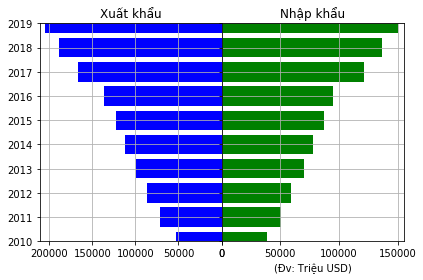

<Figure size 1440x2880 with 0 Axes>

In [32]:
y = np.array(sum_ex_value.index)
x1 = sum_ex_value.values.flatten()
x2 = sum_im_value.values.flatten()
fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(y, x1, align='center', color='blue')
axes[1].barh(y, x2, align='center', color='green')
axes[0].set(title='Xuất khẩu')
axes[1].set(title='Nhập khẩu')
axes[0].invert_xaxis()
# axes[0].set(yticks=y, yticklabels=states)
# axes[0].yaxis.tick_right()
for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)
plt.ylim(2010,2019)
plt.xlabel(xlabel="(Đv: Triệu USD)")
fig.tight_layout()
fig.subplots_adjust(wspace=0)
plt.figure(figsize=(20,40))
plt.show()

- Thông qua biểu đồ trên ta có thể thấy tốc độ tăng trưởng kinh tế của Việt Nam luôn tăng qua từng năm thông qua hai giá trị nhập khẩu và xuất khẩu. Hai giá trị này gần như tăng trưởng cùng tỉ lệ, tuy nhiên giá trị Xuất khẩu luôn lớn hơn.
- Để thấy rõ hơn sự so sánh xin mời xem biểu đồ phía dưới đây:

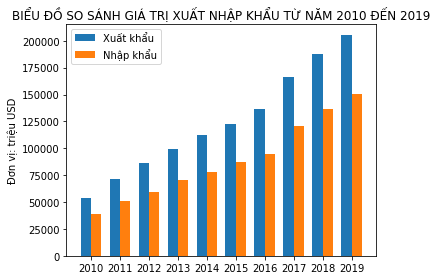

In [33]:
y = np.array(sum_ex_value.index)
x1 = sum_ex_value.values.flatten()
x2 = sum_im_value.values.flatten()

n = np.arange(len(y))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
ax.bar(n - width/2, x1, width, label='Xuất khẩu')
ax.bar(n + width/2, x2, width, label='Nhập khẩu')

ax.set_ylabel('Đơn vị: triệu USD')
ax.set_title('BIỂU ĐỒ SO SÁNH GIÁ TRỊ XUẤT NHẬP KHẨU TỪ NĂM 2010 ĐẾN 2019')
ax.set_xticks(n)
ax.set_xticklabels(y)
ax.legend()
fig.tight_layout()

plt.show()